In [28]:
import Z_Score_Strategy
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
strategy = Z_Score_Strategy.Algorithmic_Trading(initial_balance=50000)
symbols = ["EURUSD=X", "GBPUSD=X"]
#"USDTRY=X", "USDMXN=X", "USDSGD=X", "USDHUF=X", "USDPLN=X", "USDCZK=X", "USDCOP=X", "USDKRW=X",
#"USDBRL=X", "USDILS=X", "EURILS=X", "EURNOK=X", "EURPLN=X", "EURNZD=X", "EURUSD=X", "EURGBP=X",
#"EURJPY=X", "EURAUD=X", "EURCAD=X", "GBPUSD=X", "GBPAUD=X", "GBPCHF=X", "GBPNZD=X", "GBPCAD=X",
#"GBPILS=X", "AUDCHF=X", "AUDCAD=X", "AUDNZD=X", "AUDUSD=X", "AUDJPY=X", "CHFJPY=X", "CADCHF=X",
#"CADJPY=X", "NZDUSD=X"]

In [13]:
exchange_data = strategy.exchange_extraction(symbols, interval='1h', period='1mo')
data_eurusd = exchange_data['EURUSD=X'].reset_index()
data_gbpusd = exchange_data['GBPUSD=X'].reset_index()
# Rename
data_eurusd = data_eurusd.rename(columns={"EURUSD=X": "Close"})
data_gbpusd = data_gbpusd.rename(columns={"GBPUSD=X": "Close"})
# Calculate Z-Score
data_eurusd['Z-Score'] = (data_eurusd['Close'] - data_eurusd['Close'].rolling(window=10).mean()) / data_eurusd['Close'].rolling(window=10).std()
data_gbpusd['Z-Score'] = (data_gbpusd['Close'] - data_gbpusd['Close'].rolling(window=10).mean()) / data_gbpusd['Close'].rolling(window=10).std()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [117]:
from scipy.stats import shapiro
data_eurusd['Close_diff_1'] = data_eurusd['Close'].diff()
data_eurusd_diff = data_eurusd.dropna(axis=0)
print(shapiro(data_eurusd_diff['Close_diff_1']))

ShapiroResult(statistic=np.float64(0.8964472186290586), pvalue=np.float64(3.4814857051676835e-18))


## Individual Example EURUSD

In [15]:
strategy.z_score_backtesting_trend_alignment(data_eurusd, 'Close', 2.25, 0.01, 0.0075, use_trend_alignment=False)

(    Type  Entry Price  Exit Price       PnL
 0    Buy     1.089206    1.076774 -0.012432
 1  Short     1.075732    1.064509  0.011222
 2    Buy     1.056859    1.047779 -0.009080
 3  Short     1.041124    1.048988 -0.007863
 4    Buy     1.053075    1.044277 -0.008798
 5  Short     1.053519    1.053519  0.000000,
    Total PnL  Win Rate  Number of Trades  Risk Reward Ratio
 0  -0.026951  0.166667                 6           1.333333)

In [16]:
strategy.z_score_backtesting_trend_alignment(data_eurusd, 'Close', 2.25, 0.01, 0.0075, use_trend_alignment=True)

(    Type  Entry Price  Exit Price       PnL
 0  Short     1.075732    1.064509  0.011222
 1  Short     1.051967    1.041124  0.010843,
    Total PnL  Win Rate  Number of Trades  Risk Reward Ratio
 0   0.022065       1.0                 2           1.333333)

## Individual Example GBPUSD

In [17]:
strategy.z_score_backtesting_trend_alignment(data_gbpusd, 'Close', 2.25, 0.01, 0.0075, use_trend_alignment=False)

(    Type  Entry Price  Exit Price       PnL
 0    Buy     1.296630    1.286289 -0.010341
 1  Short     1.294398    1.280918  0.013480
 2  Short     1.279116    1.265775  0.013341
 3    Buy     1.266191    1.255950 -0.010241
 4  Short     1.251752    1.261145 -0.009393
 5  Short     1.251408    1.261862 -0.010454
 6  Short     1.263600    1.271601 -0.008002,
    Total PnL  Win Rate  Number of Trades  Risk Reward Ratio
 0   -0.02161  0.285714                 7           1.333333)

In [18]:
strategy.z_score_backtesting_trend_alignment(data_gbpusd, 'Close', 2.25, 0.01, 0.0075, use_trend_alignment=True)

(    Type  Entry Price  Exit Price       PnL
 0  Short     1.285050    1.270890  0.014159
 1  Short     1.269471    1.255950  0.013520
 2  Short     1.251752    1.261145 -0.009393
 3  Short     1.251408    1.261862 -0.010454,
    Total PnL  Win Rate  Number of Trades  Risk Reward Ratio
 0   0.007833       0.5                 4           1.333333)

## Grid Search Optimization

In [45]:
# Parameters 
z_score_values = [1.25, 1.5, 2]
profit_targets = [0.005, 0.0075, 0.01, 0.0125, 0.015]
stop_losses = [0.005, 0.0075, 0.01]
# EURUSD both strategies
eurusd_params, eurusd_results = strategy.optimize_zscore_parameters(data_eurusd, 'Close', z_score_values, profit_targets, stop_losses, use_trend_alignment=False)
eurusd_params_2, eurusd_results_2 = strategy.optimize_zscore_parameters(data_eurusd, 'Close', z_score_values, profit_targets, stop_losses, use_trend_alignment=True)
# GBPUSD both strategies
gbpusd_params, gbpusd_results = strategy.optimize_zscore_parameters(data_gbpusd, 'Close', z_score_values, profit_targets, stop_losses, use_trend_alignment=False)
gbpusd_params_2, gbpusd_results_2 = strategy.optimize_zscore_parameters(data_gbpusd, 'Close', z_score_values, profit_targets, stop_losses, use_trend_alignment=True)

## Join Data

In [51]:
eurusd_results_2.columns = [x + ' Trend Alignment' for x in eurusd_results_2.columns]
gbpusd_results_2.columns = [x + ' Trend Alignment' for x in gbpusd_results_2.columns]
eurusd_results_all = pd.concat([eurusd_results, eurusd_results_2], axis=1)

In [70]:
gbpusd_results_all = pd.concat([gbpusd_results, gbpusd_results_2], axis=1)

In [34]:
def plot_pnl_heatmaps(data):
    """
    Plot Total PnL heatmaps with different Z-Score Thresholds, comparing strategies.
    Colormap centered at 0.00
    """
    sns.set(style="whitegrid")
    z_scores = sorted(data['Z-Score Threshold'].unique())
    
    # Subplots
    fig, axes = plt.subplots(nrows=len(z_scores), ncols=2, figsize=(14, len(z_scores)*3))
    fig.suptitle('Total PnL Heatmaps by Z-Score Threshold and Trend Alignment', fontsize=16)
    # Determine the range for the colormap to center at zero
    all_pnls = pd.concat([data['Total PnL'], data['Total PnL Trend Alignment']])
    vmin = all_pnls.min()
    vmax = all_pnls.max()
    max_abs_pnl = max(abs(vmin), abs(vmax))
    
    # Iterate Z-Score
    for i, z_score in enumerate(z_scores):
        # Filter Data
        df_no_trend = data[data['Z-Score Threshold'] == z_score]
        df_trend = data[data['Z-Score Threshold Trend Alignment'] == z_score]
        # Pivot Tables for Heatmaps
        pivot_no_trend = df_no_trend.pivot_table(index='Profit Target', columns='Stop Loss', values='Total PnL',
                                                 aggfunc='mean')
        pivot_trend = df_trend.pivot_table(index='Profit Target Trend Alignment', columns='Stop Loss Trend Alignment',
                                           values='Total PnL Trend Alignment', aggfunc='mean')
        # Sort the indices for consistent plotting
        pivot_no_trend = pivot_no_trend.sort_index().sort_index(axis=1)
        pivot_trend = pivot_trend.sort_index().sort_index(axis=1)
        
        # Plot Heatmaps
        sns.heatmap(pivot_no_trend, ax=axes[i, 0], annot=True, fmt=".4f", cmap="RdYlGn", center=0.0,
                    vmin=-max_abs_pnl, vmax=max_abs_pnl, cbar_kws={'label': 'Total PnL'})
        sns.heatmap(pivot_trend, ax=axes[i, 1], annot=True, fmt=".4f", cmap="RdYlGn", center=0.0,
                    vmin=-max_abs_pnl, vmax=max_abs_pnl, cbar={"label": "Total PnL"})
        
        # Set titles and labels
        axes[i, 0].set_title(f'Z-Score {z_score} - Without Trend Alignment')
        axes[i, 1].set_title(f'Z-Score {z_score} - With Trend Alignment')
        axes[i, 0].set_xlabel('Stop Loss')
        axes[i, 0].set_ylabel('Profit Target')
        axes[i, 1].set_xlabel('Stop Loss')
        axes[i, 1].set_ylabel('Profit Target')

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
        

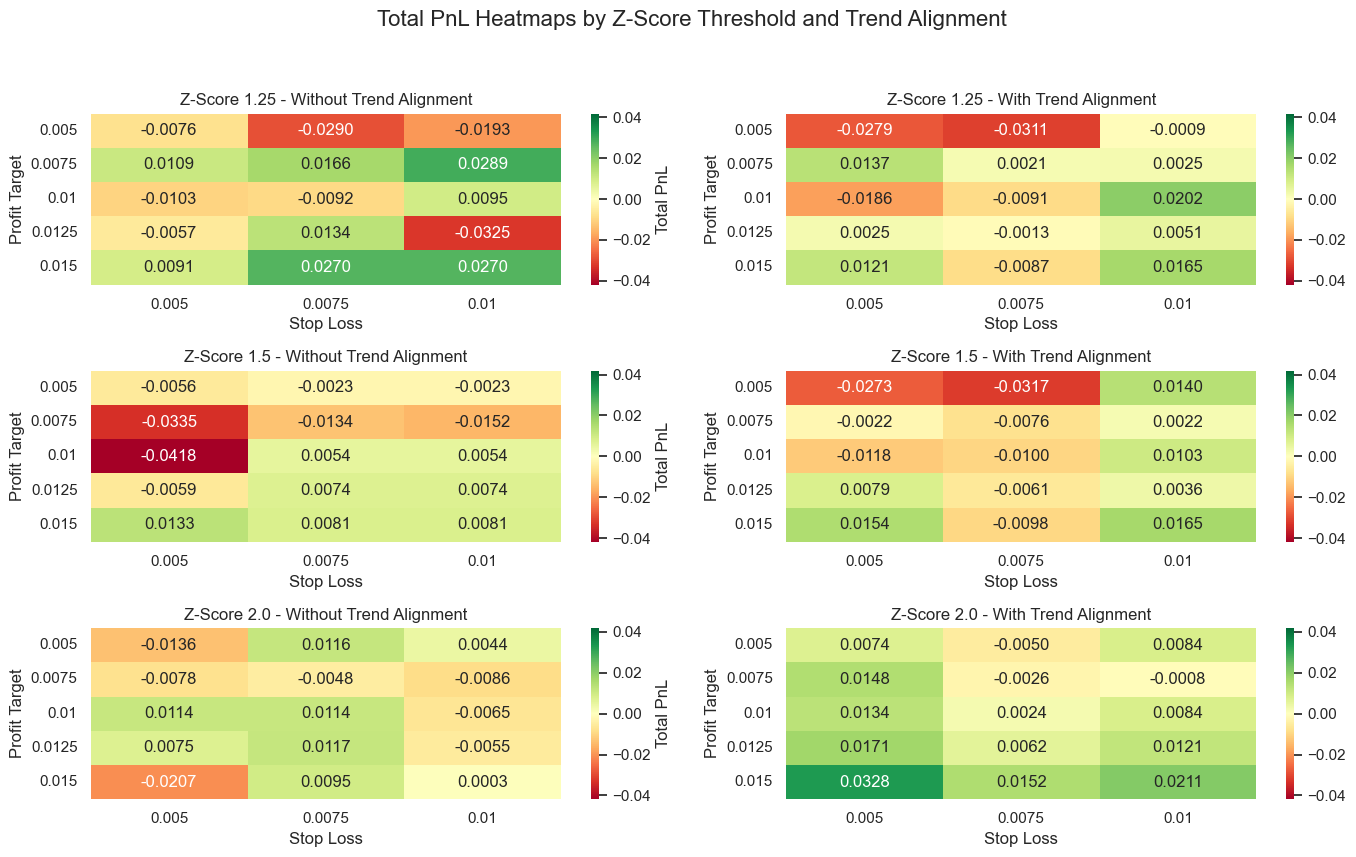

In [54]:
plot_pnl_heatmaps(eurusd_results_all)

In [75]:
gbpusd_results_all['Total PnL Trend Alignment'].mean()

np.float64(0.022417796982659235)

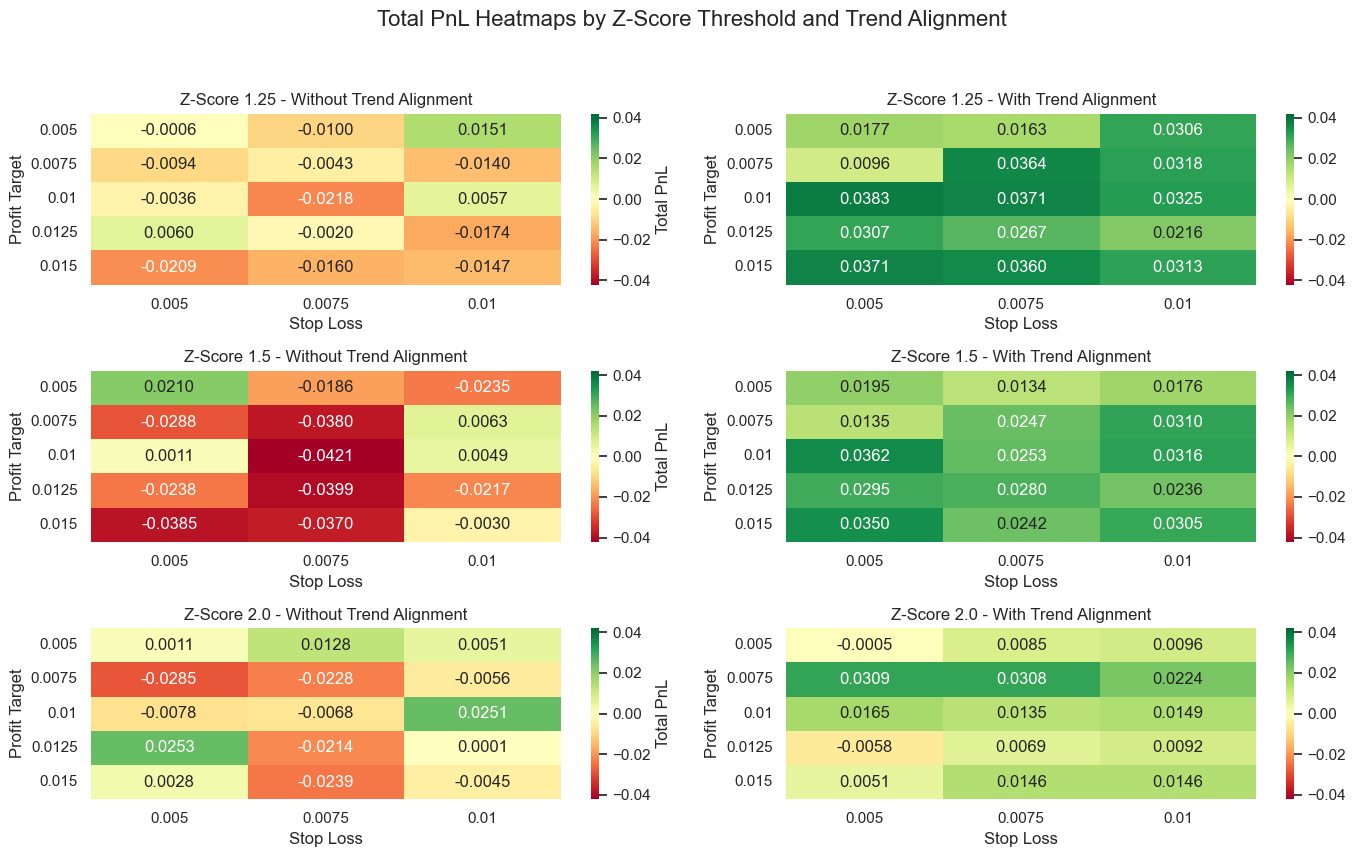

In [71]:
plot_pnl_heatmaps(gbpusd_results_all)

In [ ]:
total_pnl_trend_alignment_top_10 = gbpusd_results_all['Total PnL Trend Alignment'].sort_values(ascending=False)[0:10]

In [85]:
gbpusd_results_all.loc[gbpusd_results_all['Total PnL Trend Alignment'].isin(total_pnl_trend_alignment_top_10)]

,Z-Score Threshold,Profit Target,Stop Loss,Total PnL,Win Rate,Number of Trades,Risk Reward Ratio,Z-Score Threshold Trend Alignment,Profit Target Trend Alignment,Stop Loss Trend Alignment,Total PnL Trend Alignment,Win Rate Trend Alignment,Number of Trades Trend Alignment,Risk Reward Ratio Trend Alignment
4,1.25,0.0075,0.0075,-0.004283,0.500000,8,1.000000,1.25,0.0075,0.0075,0.036445,0.833333,6,1.000000
5,1.25,0.0075,0.0100,-0.014014,0.500000,6,0.750000,1.25,0.0075,0.0100,0.031808,0.833333,6,0.750000
6,1.25,0.0100,0.0050,-0.003595,0.375000,8,2.000000,1.25,0.0100,0.0050,0.038295,0.666667,6,2.000000
7,1.25,0.0100,0.0075,-0.021768,0.375000,8,1.333333,1.25,0.0100,0.0075,0.037106,0.800000,5,1.333333
8,1.25,0.0100,0.0100,0.005739,0.600000,5,1.000000,1.25,0.0100,0.0100,0.032469,0.800000,5,1.000000
12,1.25,0.0150,0.0050,-0.020950,0.250000,8,3.000000,1.25,0.0150,0.0050,0.037141,0.600000,5,3.000000
13,1.25,0.0150,0.0075,-0.016000,0.200000,5,2.000000,1.25,0.0150,0.0075,0.035953,0.750000,4,2.000000
21,1.50,0.0100,0.0050,0.001088,0.428571,7,2.000000,1.50,0.0100,0.0050,0.036168,0.666667,6,2.000000
23,1.50,0.0100,0.0100,0.004917,0.600000,5,1.000000,1.50,0.0100,0.0100,0.031647,0.800000,5,1.000000
27,1.50,0.0150,0.0050,-0.038476,0.181818,11,3.000000,1.50,0.0150,0.0050,0.035014,0.600000,5,3.000000
